# Import Essential Libraries

In [3]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
from numba import jit

# Calculate the symbolic integral of f(x)

In [4]:
x = sp.symbols('x')
function = (x**3)*(sp.sin(4*x))
f = sp.integrate( function, x )

### f'(x)

In [5]:
f

-x**3*cos(4*x)/4 + 3*x**2*sin(4*x)/16 + 3*x*cos(4*x)/32 - 3*sin(4*x)/128

# Implement Monte Carlo integrator

In [40]:
def f(x):
    return ((x**3)*(np.sin(4*x)))

In [41]:
@jit
def mcintegrate(a,b,n,f):
    
    # a --> b, ingration limits
    # n, number of samples to take
    # function integrating [ f(x) = x^3 * SIN(4 * x) ]
    
    # psuedo code: [ (b-a)/a * sum(i=1, n, f(xi)) ]
    np.random.seed(1)
    c = (b - a)/n
    summation = 0
    for i in range(n): 
        ran = np.random.rand()*(b-a)+a
        summation = summation + f(ran)
    return c*summation

In [42]:
mcintegrate(1.0,7.0,1000,f)

78.896573187131708

# Studying the Error

In [43]:
absolute = sp.integrate( function, (x, 1.0, 7.00))
absolute

84.4163716059117

In [44]:
# List of samples (x-axis)
samples = []
for i in range(1000,101000,1000):
    samples.append(i)

In [45]:
# List of estimates
estimate = []
for i in samples:
    n = mcintegrate(1.0, 7.0, i, f)
    estimate.append( n )

In [46]:
# List of errors using numpy's absolute error
error = []
for i in estimate:
    er = np.absolute(absolute - i)
    error.append(er)

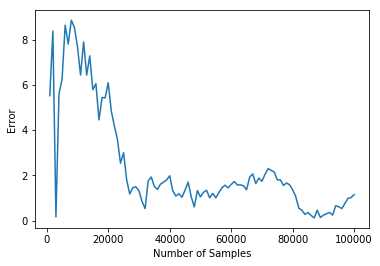

In [47]:
# Plots Number of Samples (samples) vs Error error
plt.plot(samples, error)
plt.ylabel("Error")
plt.xlabel("Number of Samples")
plt.show()